# Data Analysis

This analysis was made along with the other steps of this project. Improvements to other notebooks were possible s new insights were gained.


In [1]:
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math

from tqdm import tqdm_notebook
from collections import Counter
from glob import glob

%matplotlib inline

sns.set(style="darkgrid")

## Defining and loading variables

In [2]:
PATH = '../'

PROCESSED_DATA_PATH = os.path.join(PATH, 'data/processed/')

DF_FAKE_PATH = os.path.join(PROCESSED_DATA_PATH, 'df_fake_clean.pkl')
DF_LEGIT_PATH = os.path.join(PROCESSED_DATA_PATH, 'df_legit_clean.pkl')

In [3]:
df_fake = pkl.load(open(DF_FAKE_PATH, 'rb'))

df_legit = pkl.load(open(DF_LEGIT_PATH, 'rb'))

## Working on the DataFrame

In [4]:
df = pd.concat((df_fake, df_legit), axis=0)

In [5]:
classes = [1, 0]

### Getting length (token and character-wise)

In [6]:
df['TEXT_LEN_CHAR'] = df['TEXT_CLEAN'].apply(len)
df['TEXT_LEN_TOKEN'] = df['TEXT_CLEAN'].apply(str.split).apply(len)
df['TITLE_LEN_CHAR'] = df['TITLE_CLEAN'].apply(len)
df['TITLE_LEN_TOKEN'] = df['TITLE_CLEAN'].apply(str.split).apply(len)

In [7]:
df.head()

,DATE,FAKE,TEXT_CLEAN,TITLE_CLEAN,TEXT_LEN_CHAR,TEXT_LEN_TOKEN,TITLE_LEN_CHAR,TITLE_LEN_TOKEN
0,03/08/2019,1,vam assin petica pel cassaca mandat bolsonaro ...,petica par impeachment bolsonar precis milho a...,275,39,85,12
1,04/08/2019,1,lul vitim golp polit merec estar preso vam ass...,petica lul livr contribu par liberdad presiden...,221,34,56,9
2,05/08/2019,1,professor cont dilm matou mari kozel filh mari...,mari kozel filh assassin dilm tir boat,157,26,38,7
3,03/08/2019,1,vergonh president oab ment pai mort milit pra ...,felip sant cruz president oab ment sobr mort p...,135,25,80,15
4,06/08/2019,1,part diabolico band abrind burac estrad feder ...,esquerd abrind burac estrad nord par consegu v...,129,20,54,9


### Making object to count words

In [8]:
all_cnt = {}
for key in tqdm_notebook(classes):
    cnt = Counter()
    for text in tqdm_notebook(df[df['FAKE'] == key]['TEXT_CLEAN']):
        cnt += Counter(set(str(text).split()))

    all_cnt[key] = cnt.most_common()

In [9]:
def get_from_sublist(wrd, counter):
    lst = [elem[0] for elem in counter]
    if wrd in lst:
        return True, counter[lst.index(wrd)][1]
    return False, -1
        

### Analyzing how many words there are in each class

0 = legit news

1 = fake news

In [10]:
n = 10
for key1 in all_cnt:
    print('========== {} ========== '.format(key1))
    total = len(df[df['FAKE'] == key1]['TEXT_CLEAN'])
    for wrd in all_cnt[key1][:n]:
        print('{}: {}/{} ({}%)'.format(wrd[0].upper(), wrd[1], total, round(wrd[1]/total * 100, 2)))
        lst = []
        for key2 in all_cnt:
            cond, val = get_from_sublist(wrd[0], all_cnt[key2])
            if key1 != key2 and cond:
                lst.append((wrd[0], val, key2))
        for item in sorted(lst, key=lambda x: -x[1]):
            print(' - {} documentos em {}'.format(item[1], item[2]))
                
        print()
    print()

========== 1 ========== 
PAR: 617/1251 (49.32%)
 - 15390 documentos em 0

BRASIL: 355/1251 (28.38%)
 - 5808 documentos em 0

SER: 347/1251 (27.74%)
 - 12941 documentos em 0

PEL: 336/1251 (26.86%)
 - 14691 documentos em 0

PRESIDENT: 285/1251 (22.78%)
 - 11592 documentos em 0

TOD: 285/1251 (22.78%)
 - 9505 documentos em 0

DIZ: 242/1251 (19.34%)
 - 7040 documentos em 0

BOAT: 233/1251 (18.63%)
 - 118 documentos em 0

VAI: 218/1251 (17.43%)
 - 4755 documentos em 0

BOLSONAR: 216/1251 (17.27%)
 - 1770 documentos em 0


========== 0 ========== 
PAR: 15390/15701 (98.02%)
 - 617 documentos em 1

PEL: 14691/15701 (93.57%)
 - 336 documentos em 1

SER: 12941/15701 (82.42%)
 - 347 documentos em 1

PRESIDENT: 11592/15701 (73.83%)
 - 285 documentos em 1

POD: 11549/15701 (73.56%)
 - 214 documentos em 1

PART: 10611/15701 (67.58%)
 - 123 documentos em 1

OUTR: 10312/15701 (65.68%)
 - 114 documentos em 1

NEST: 10186/15701 (64.87%)
 - 67 documentos em 1

GOVERN: 10032/15701 (63.89%)
 - 164 documen

### Bar plot of most occurring tokens

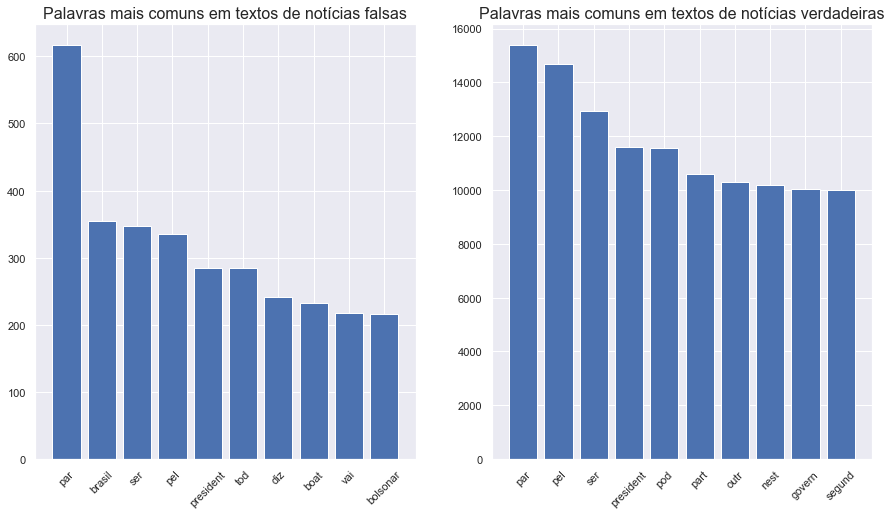

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 8))

ax[0].bar([plv[0] for plv in all_cnt[1][:10]], [plv[1] for plv in all_cnt[1][:10]])
ax[0].set_title('Palavras mais comuns em textos de notícias falsas', fontdict={'size': 16})

ax[1].bar([plv[0] for plv in all_cnt[0][:10]], [plv[1] for plv in all_cnt[0][:10]])
ax[1].set_title('Palavras mais comuns em textos de notícias verdadeiras', fontdict={'size': 16})

for i in range(2):
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(45)

In [12]:
def get_size(cls):
    return len(df[df['FAKE'] == cls])

### Amount of tokens distribution

Text(0.5, 1.0, 'Notícia falsas')

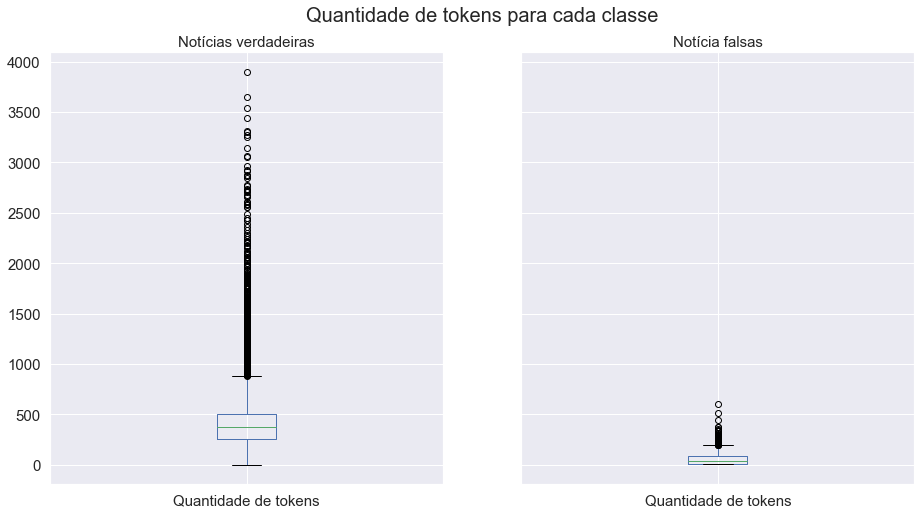

In [13]:
df_plot = df.rename(columns={"TEXT_LEN_TOKEN": "Quantidade de tokens"})
# df_plot['FAKE'] = df_plot['FAKE'].replace({0: "Noticia verdadeira", 1: "Noticia falsa"})
ax = df_plot.groupby("FAKE").boxplot(column=["Quantidade de tokens"], figsize=(15, 8), layout=(1, 2), fontsize=15)
ax[0].get_figure().suptitle('Quantidade de tokens para cada classe', fontsize=20)
ax[0].set_title("Notícias verdadeiras", fontsize=15)
ax[1].set_title("Notícia falsas", fontsize=15)

### Corpus size plot

100
10


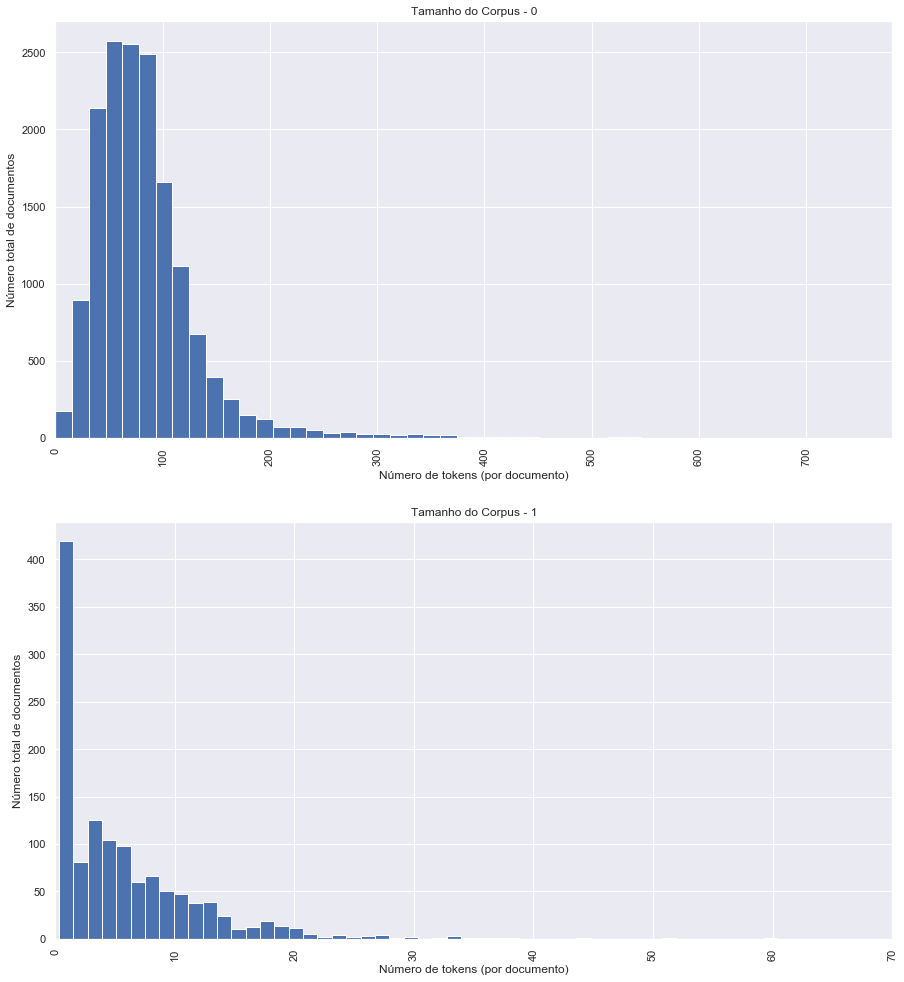

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
fig.subplots_adjust(top=1.4)
for i, cls in enumerate(sorted(classes, key=get_size, reverse=True)):
#     n_bins = 2 * len(set(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN'].apply(lambda x: round(x / 100) * 100)))
    n_bins = 50
    x_min = math.floor(min(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN']) / 100) * 100
    x_max = math.ceil(max(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN']) / 100) * 100
    x_step = int(math.pow(10, math.ceil(math.log(math.floor((x_max - x_min) / 100), 10))))
    print(x_step)
    ax[i].set(xlim=(x_min, x_max))
    ax[i].hist(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN'], bins=n_bins, align='mid')
    ax[i].set_xticklabels(range(x_min, x_max, x_step), rotation=90)
    
    ax[i].set_title('Tamanho do Corpus - {}'.format(cls))
    ax[i].set_xlabel('Número de tokens (por documento)');
    ax[i].set_ylabel('Número total de documentos');

### WordClouds for each class

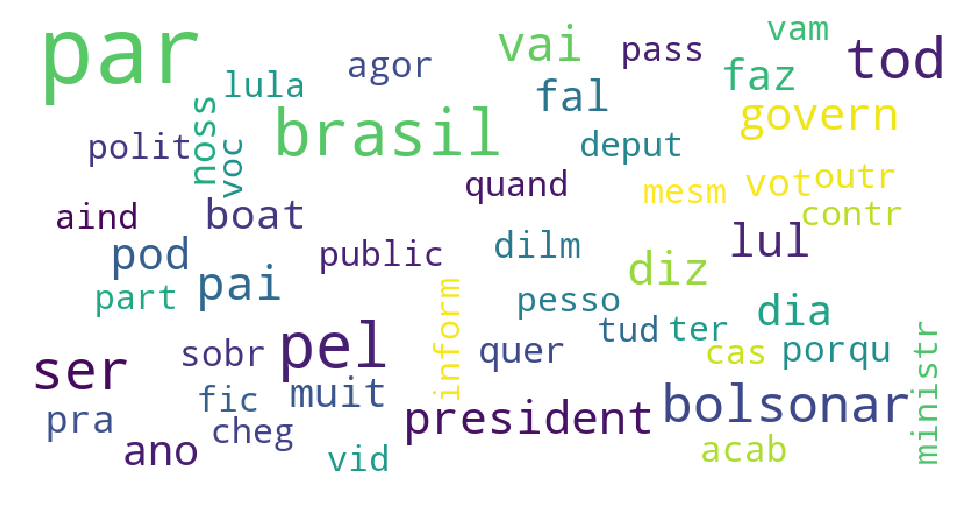

In [15]:
from wordcloud import WordCloud

data = [wrd for lst in df_fake['TEXT_CLEAN'] for wrd in lst.split()]
wc = WordCloud(
               background_color='white',
               max_words=50,
               max_font_size=80, 
               random_state=42,
               height=400,
               width=800
               ).generate(' '.join(data))

print(wc)
fig = plt.figure(1, dpi=200)
plt.imshow(wc)
plt.axis('off')
plt.show()
# fig.savefig("plots/word1.png", dpi=900)

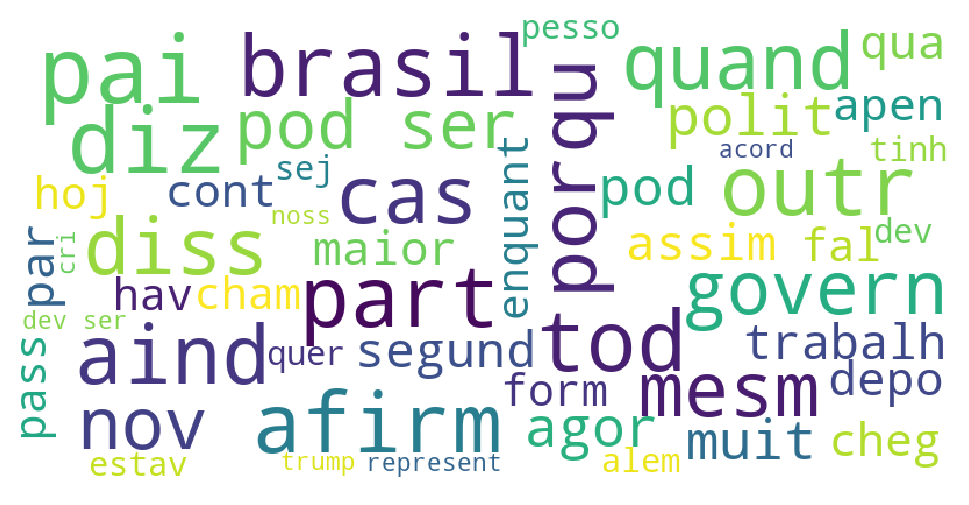

In [16]:
data = [wrd for lst in df_legit['TEXT_CLEAN'] for wrd in lst.split()]
wc = WordCloud(
                    background_color='white',
                    max_words=50,
                    max_font_size=80, 
                    random_state=42,
                    height=400,
                    width=800
                    ).generate(' '.join(data))

print(wc)
fig = plt.figure(1, dpi=200)
plt.imshow(wc)
plt.axis('off')
plt.show()